In [74]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Total License Count Data

In [75]:
df = pd.read_csv('license_counts.csv')
df.head()

,cc-by,cc-by-sa,cc-by-nd,cc-by-nc,cc-by-nc-sa,cc-by-nc-nd
0,12717,2614,552,6352,20320,4438


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'cc-by'),
  Text(1, 0, 'cc-by-sa'),
  Text(2, 0, 'cc-by-nd'),
  Text(3, 0, 'cc-by-nc'),
  Text(4, 0, 'cc-by-nc-sa'),
  Text(5, 0, 'cc-by-nc-nd')])

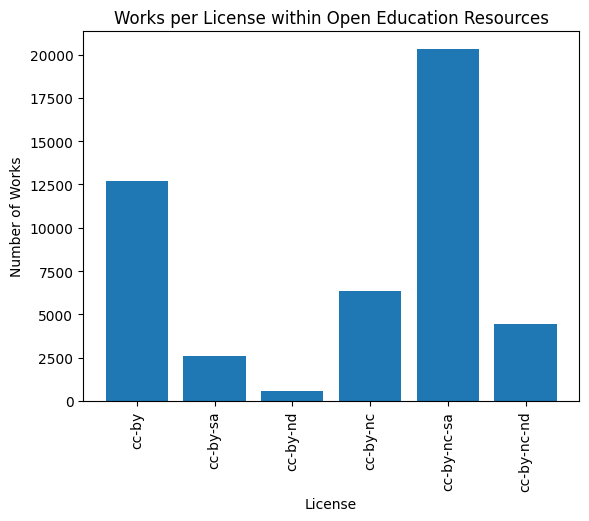

In [76]:
plt.bar(df.columns, df.iloc[0])
plt.title("Works per License within Open Education Resources")
plt.xlabel("License")
plt.ylabel("Number of Works")
plt.xticks(rotation=90)

# Licensed Works Data

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
oer_df = pd.read_csv("oer.csv", delimiter='\t')

In [79]:
oer_df = oer_df.rename(columns={"Education Level": "education_level", "Subject Area": "subject_area", "Material Type": "material_type", "Media Format": "media_format", "Primary User": "primary_user", "Educational Use": "educational_use"})

In [80]:
oer_df['modification_date'] = oer_df['modification_date'].apply(pd.to_datetime)

In [81]:
# Expand columns
new_columns = {
    "education_level": [],
    "subject_area": [],
    "material_type": [],
    "media_format": [],
    "Languages": [],
    "primary_user": [],
    "educational_use": []
}
new_columns

{'education_level': [],
 'subject_area': [],
 'material_type': [],
 'media_format': [],
 'Languages': [],
 'primary_user': [],
 'educational_use': []}

In [82]:
def get_unique_values(column):
    lst = oer_df[column].unique()
    set_items = set()
    # Get unique values
    for item in lst:
        split = str(item).split(",")
        for value in split:
            set_items.add(value)
    # Create new columns
    for item in set_items:
        oer_df[f'{column}_{item}'] = 0
        new_columns[column].append(f'{column}_{item}')
    # return set_items

for key in new_columns:
    get_unique_values(key)

In [83]:
def expand_columns(row):
    for key in new_columns:
        split = str(row[key]).split(",")
        for item in split:
            row[f'{key}_{item}'] = 1
    return row

In [84]:
oer_df = oer_df.apply(expand_columns, axis=1)

In [85]:
oer_df.head()

,id,license,modification_date,education_level,subject_area,material_type,media_format,Languages,primary_user,educational_use,...,primary_user_other,primary_user_librarian,primary_user_administrator,primary_user_nan,educational_use_curriculum-instruction,educational_use_other,educational_use_assessment,educational_use_informal-education,educational_use_professional-development,educational_use_nan
0,86509,cc-by,2023-02-01,"middle-school,high-school",u-s-history,lesson-plan,"downloadable-docs,video",en,teacher,curriculum-instruction,...,0,0,0,0,1,0,0,0,0,0
1,88278,cc-by,2021-11-23,lower-primary,mathematics,activity-lab,NaN,en,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
2,73381,cc-by,2020-10-14,lower-primary,mathematics,interactive,NaN,en,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
3,6153,cc-by,2019-08-08,"upper-primary,high-school",mathematics,"activity-lab,lesson-plan,teaching-learning-str...",text-html,en,teacher,professional-development,...,0,0,0,0,0,0,0,0,1,0
4,8397,cc-by,2016-01-28,high-school,life-science,full-course,"downloadable-docs,text-html",en,"student,teacher",curriculum-instruction,...,0,0,0,0,1,0,0,0,0,0


# Subject Area EDA

In [96]:
subject_area_df_columns = ["id", "license", "subject_area"] + (new_columns["subject_area"])
subject_area_df = oer_df[subject_area_df_columns].copy()

In [97]:
subject_area_df.head()

,id,license,subject_area,subject_area_social-science,subject_area_reading-foundation-skills,subject_area_ratios-and-proportions,subject_area_maritime-science,subject_area_world-history,subject_area_political-science,subject_area_genetics,...,subject_area_functions,subject_area_anatomy-physiology,subject_area_finance,subject_area_marketing,subject_area_anthropology,subject_area_law,subject_area_accounting,subject_area_architecture-and-design,subject_area_reading-informational-text,subject_area_performing-arts
0,86509,cc-by,u-s-history,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,88278,cc-by,mathematics,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,73381,cc-by,mathematics,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6153,cc-by,mathematics,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8397,cc-by,life-science,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
subject_area_df.sum(axis=1)

0        86510
1        88279
2        73382
3         6154
4         8398
         ...  
46947    10705
46948    13069
46949    23650
46950    26622
46951    46259
Length: 46952, dtype: int64

In [119]:
grouped_subject = subject_area_df.groupby("license")[new_columns["subject_area"]].sum()

In [120]:
def rename_subject_area_columns(column_name):
    return column_name[13:]
grouped_subject.columns = grouped_subject.columns.map(rename_subject_area_columns)

In [128]:
grouped_subject["license"] = ['cc-by', 'cc-by-nc', 'cc-by-nc-nd', 'cc-by-nc-sa', 'cc-by-nd', 'cc-by-sa']

In [131]:
grouped_subject = grouped_subject.drop(columns=['nan'])

In [134]:
grouped_subject.loc["Total"] = grouped_subject.sum()
grouped_subject

,social-science,reading-foundation-skills,ratios-and-proportions,maritime-science,world-history,political-science,genetics,graphic-design,general-law,mathematics,...,anatomy-physiology,finance,marketing,anthropology,law,accounting,architecture-and-design,reading-informational-text,performing-arts,license
license,,,,,,,,,,,,,,,,,,,,,
cc-by,562,69,44,2,266,339,29,16,32,1566,...,146,41,156,55,90,46,94,75,115,cc-by
cc-by-nc,786,37,53,3,41,113,12,11,11,522,...,21,39,14,21,22,5,23,75,22,cc-by-nc
cc-by-nc-nd,334,33,12,0,41,53,4,3,9,204,...,211,93,6,3,21,2,20,30,62,cc-by-nc-nd
cc-by-nc-sa,388,34,23,10,74,320,90,14,41,1714,...,88,85,35,42,94,31,75,106,141,cc-by-nc-sa
cc-by-nd,8,1,1,0,8,7,0,2,1,25,...,88,9,3,0,3,0,6,7,3,cc-by-nd
cc-by-sa,107,4,13,0,15,81,8,9,7,209,...,16,13,12,10,24,10,16,29,7,cc-by-sa
Total,4370,356,292,30,890,1826,286,110,202,8480,...,1140,560,452,262,508,188,468,644,700,cc-bycc-by-nccc-by-nc-ndcc-by-nc-sacc-by-ndcc-...


In [136]:
grouped_subject_totals = pd.DataFrame()
grouped_subject_totals["Subject"] = grouped_subject.columns

In [142]:
grouped_subject.loc["Total"]

social-science                                                             4370
reading-foundation-skills                                                   356
ratios-and-proportions                                                      292
maritime-science                                                             30
world-history                                                               890
                                                    ...                        
accounting                                                                  188
architecture-and-design                                                     468
reading-informational-text                                                  644
performing-arts                                                             700
license                       cc-bycc-by-nccc-by-nc-ndcc-by-nc-sacc-by-ndcc-...
Name: Total, Length: 98, dtype: object

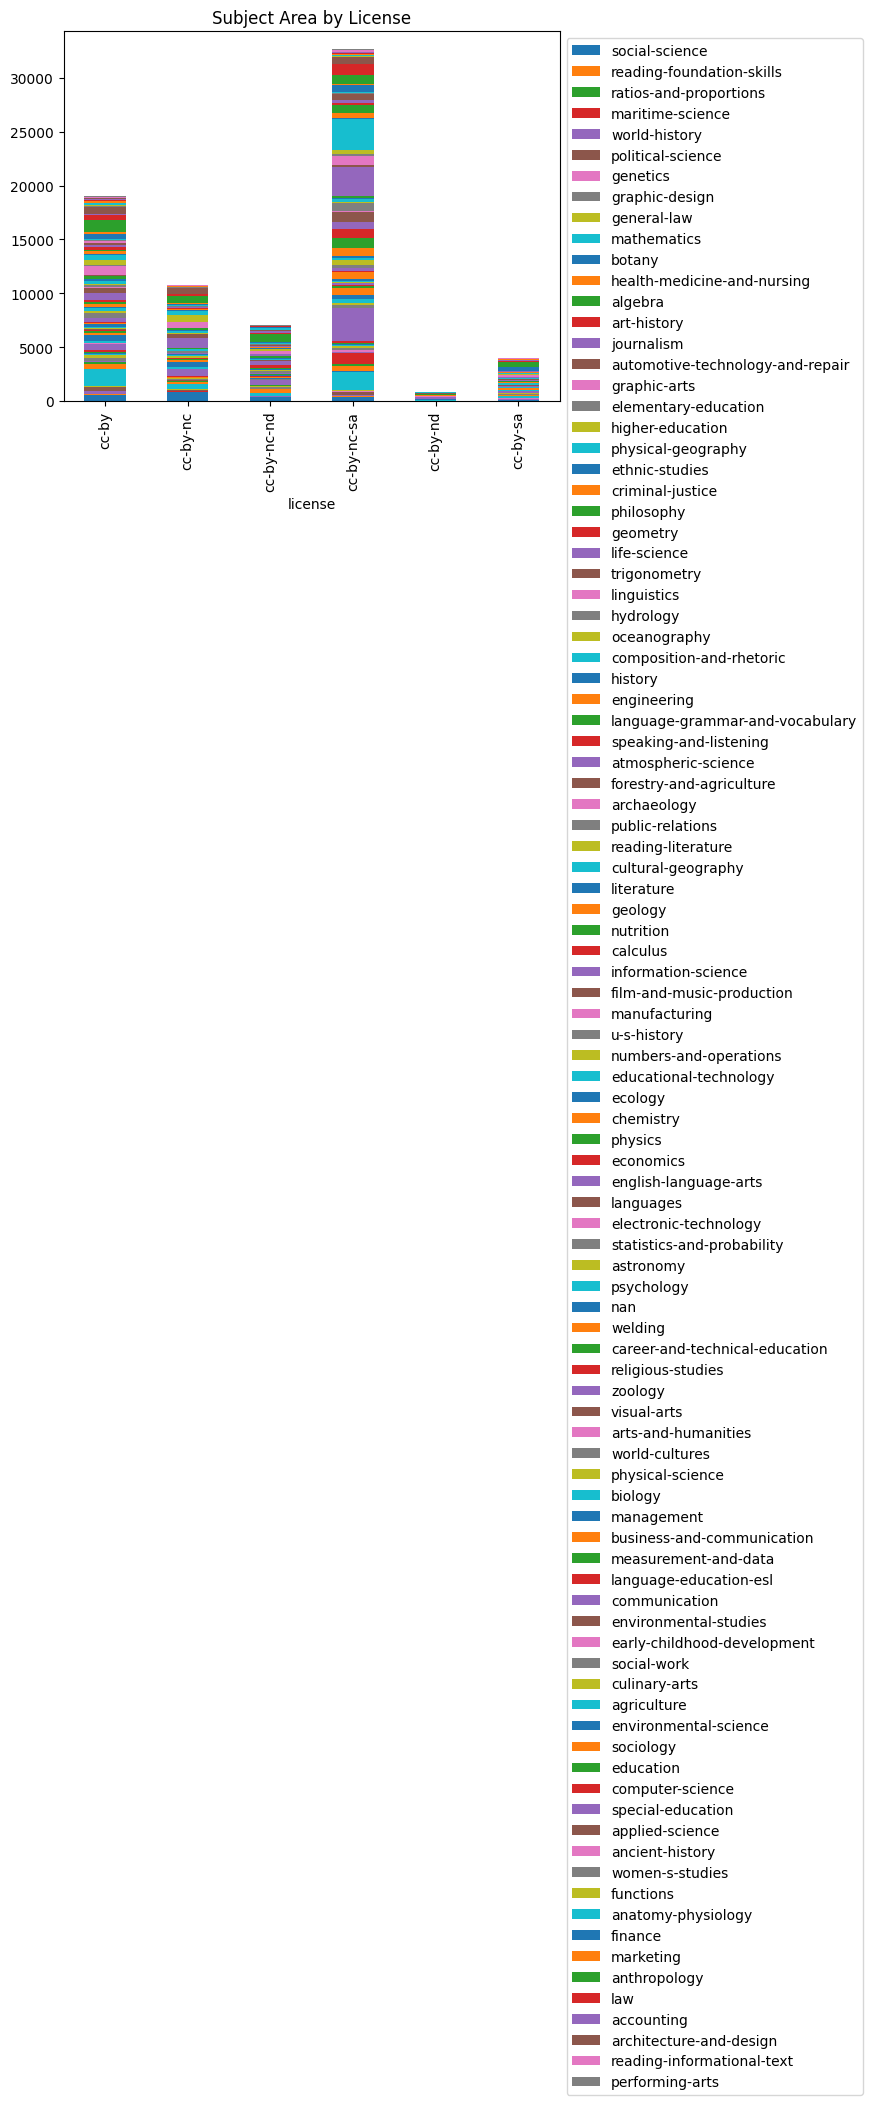

In [130]:
ax = grouped_subject.plot(x="license", kind="bar", stacked=True, title="Subject Area by License")
ax.legend(bbox_to_anchor=(1.0, 1.0))